In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
#load dataset
df = pd.read_csv('bank_churn.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#data understanding
print(df.info())
print(df.head())
print(df.isnull().sum())  # missingness table
print(df.duplicated().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#cleaning and preprocessing
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head(5)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#make a copy of the original dataframe
df_original= df.copy()

#introduce some missing values in the dataset
#replace some values with NaN to simulate missing data
df_original.iloc[25:35, 3] = np.nan
df_original.iloc[45:55, 6] = np.nan

# Duplicate the first row (index 2) 3 times
row_to_duplicate = df_original.loc[[2]]
duplicated_rows = pd.concat([row_to_duplicate] * 3, ignore_index=True)
# Concatenate with the original DataFrame
df_org = pd.concat([df_original, duplicated_rows], ignore_index=True)
print("df_original: ")
print(df_org.head(55), "\n")
print(df_org, "\n")

df_original: 
    rownumber  customerid        surname  creditscore geography  gender   age  \
0           1    15634602       Hargrave        619.0    France  Female  42.0   
1           2    15647311           Hill        608.0     Spain  Female  41.0   
2           3    15619304           Onio        502.0    France  Female  42.0   
3           4    15701354           Boni        699.0    France  Female  39.0   
4           5    15737888       Mitchell        850.0     Spain  Female  43.0   
5           6    15574012            Chu        645.0     Spain    Male  44.0   
6           7    15592531       Bartlett        822.0    France    Male  50.0   
7           8    15656148         Obinna        376.0   Germany  Female  29.0   
8           9    15792365             He        501.0    France    Male  44.0   
9          10    15592389             H?        684.0    France    Male  27.0   
10         11    15767821         Bearce        528.0    France    Male  31.0   
11         12 

In [7]:
#missing and duplicate
print("Missing values per column: ")
print(df_org.isna().sum())
print("Duplicate rows: ", df_org.duplicated().sum())

Missing values per column: 
rownumber           0
customerid          0
surname             0
creditscore        10
geography           0
gender              0
age                10
tenure              0
balance             0
numofproducts       0
hascrcard           0
isactivemember      0
estimatedsalary     0
exited              0
dtype: int64
Duplicate rows:  3


In [8]:
#drop duplicates
df_org = df_org.drop_duplicates()
print("DataFrame with duplicates dropped:")
print(df_org)

DataFrame with duplicates dropped:
      rownumber  customerid    surname  creditscore geography  gender   age  \
0             1    15634602   Hargrave        619.0    France  Female  42.0   
1             2    15647311       Hill        608.0     Spain  Female  41.0   
2             3    15619304       Onio        502.0    France  Female  42.0   
3             4    15701354       Boni        699.0    France  Female  39.0   
4             5    15737888   Mitchell        850.0     Spain  Female  43.0   
...         ...         ...        ...          ...       ...     ...   ...   
9995       9996    15606229   Obijiaku        771.0    France    Male  39.0   
9996       9997    15569892  Johnstone        516.0    France    Male  35.0   
9997       9998    15584532        Liu        709.0    France  Female  36.0   
9998       9999    15682355  Sabbatini        772.0   Germany    Male  42.0   
9999      10000    15628319     Walker        792.0    France  Female  28.0   

      tenure    

In [9]:
#using iterative for missing values
from fancyimpute import IterativeImputer

numeric_cols = df_org.select_dtypes(include=['number']).columns
df_org[numeric_cols] = IterativeImputer(max_iter = 15, random_state=0).fit_transform(df_org[numeric_cols])
df_org['age'] = df_org['age'].round().astype(int)
df_org['creditscore'] = df_org['creditscore'].round().astype(int)
df_org.head(55)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1.0,15634602.0,Hargrave,619,France,Female,42,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608,Spain,Female,41,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502,France,Female,42,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699,France,Female,39,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850,Spain,Female,43,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
5,6.0,15574012.0,Chu,645,Spain,Male,44,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0
6,7.0,15592531.0,Bartlett,822,France,Male,50,7.0,0.00,2.0,1.0,1.0,10062.80,0.0
7,8.0,15656148.0,Obinna,376,Germany,Female,29,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0
8,9.0,15792365.0,He,501,France,Male,44,4.0,142051.07,2.0,0.0,1.0,74940.50,0.0
9,10.0,15592389.0,H?,684,France,Male,27,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0


In [10]:
#save processed version
df_org.to_csv("bankchurn_clean.csv", index=False)

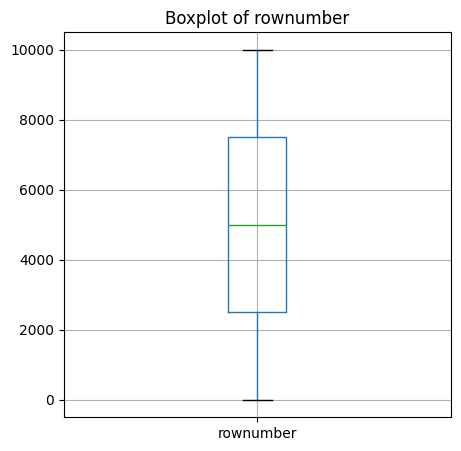

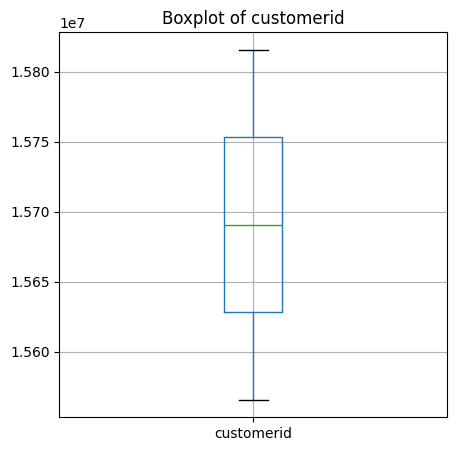

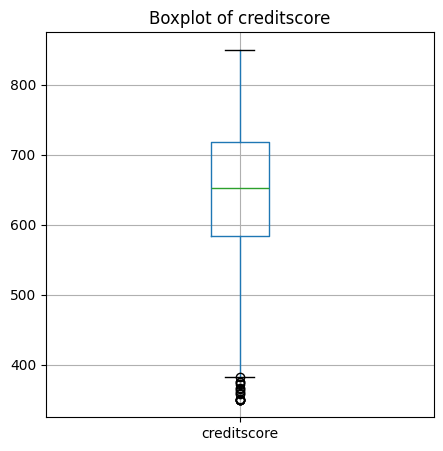

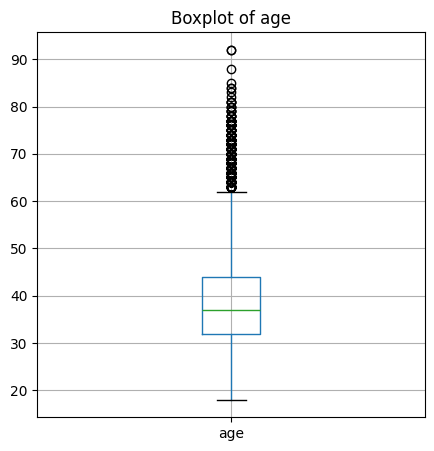

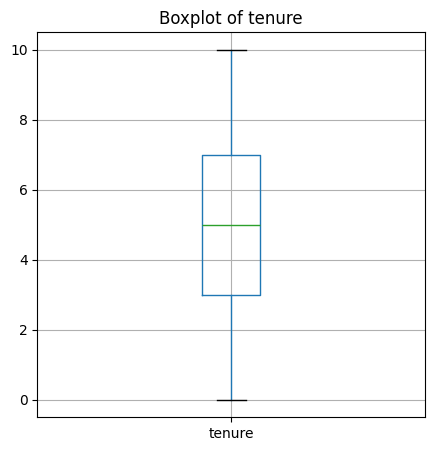

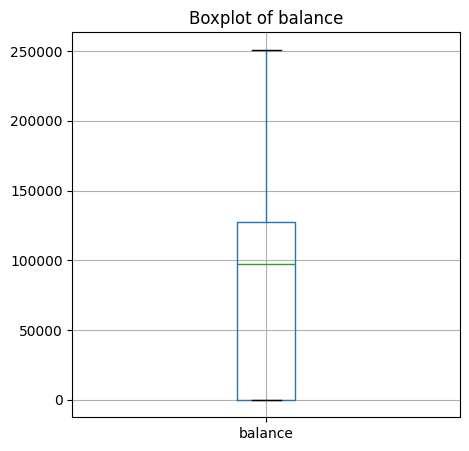

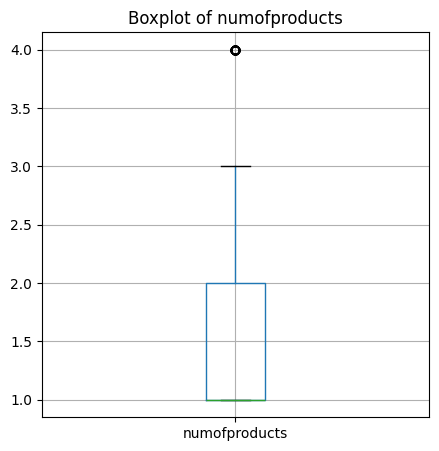

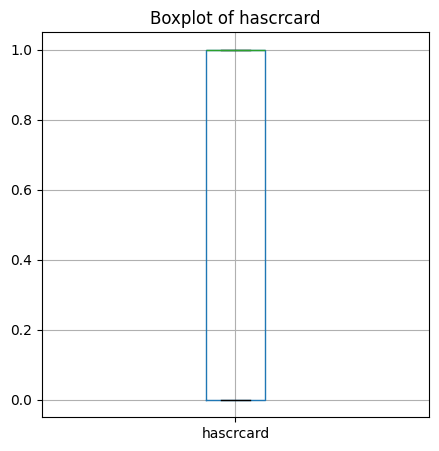

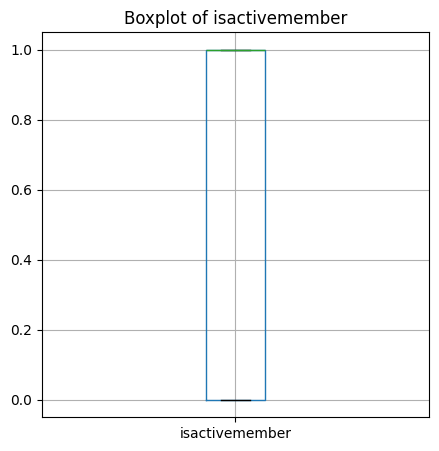

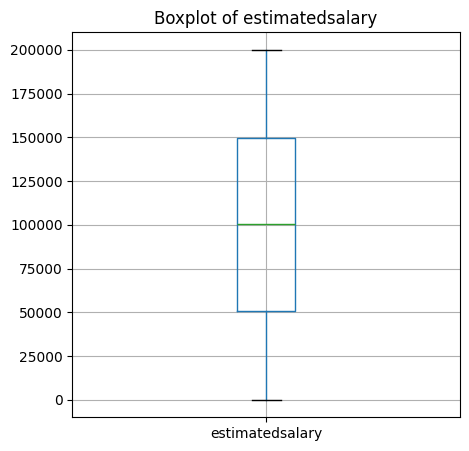

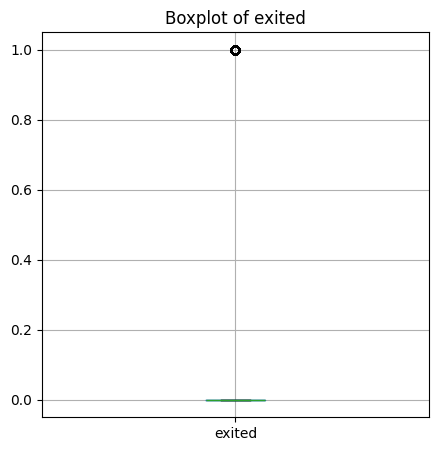

In [11]:
#boxplots
numeric_cols = df_org.select_dtypes(include=['number']).columns
for column in numeric_cols:
    plt.figure(figsize = (5, 5)) #new figure for each plot
    df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}') #add title
    plt.show()

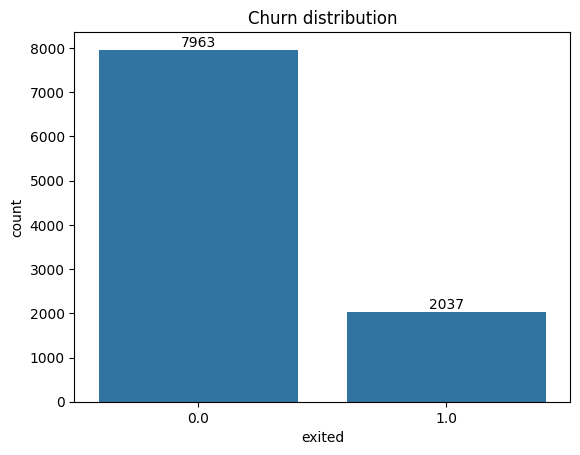

<Figure size 640x480 with 0 Axes>

In [12]:
#EDA
#churn distribution
plt.figure()
ax = sns.countplot(x='exited', data=df_org) 
plt.title("Churn distribution")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
plt.savefig("churn_distribition.png")



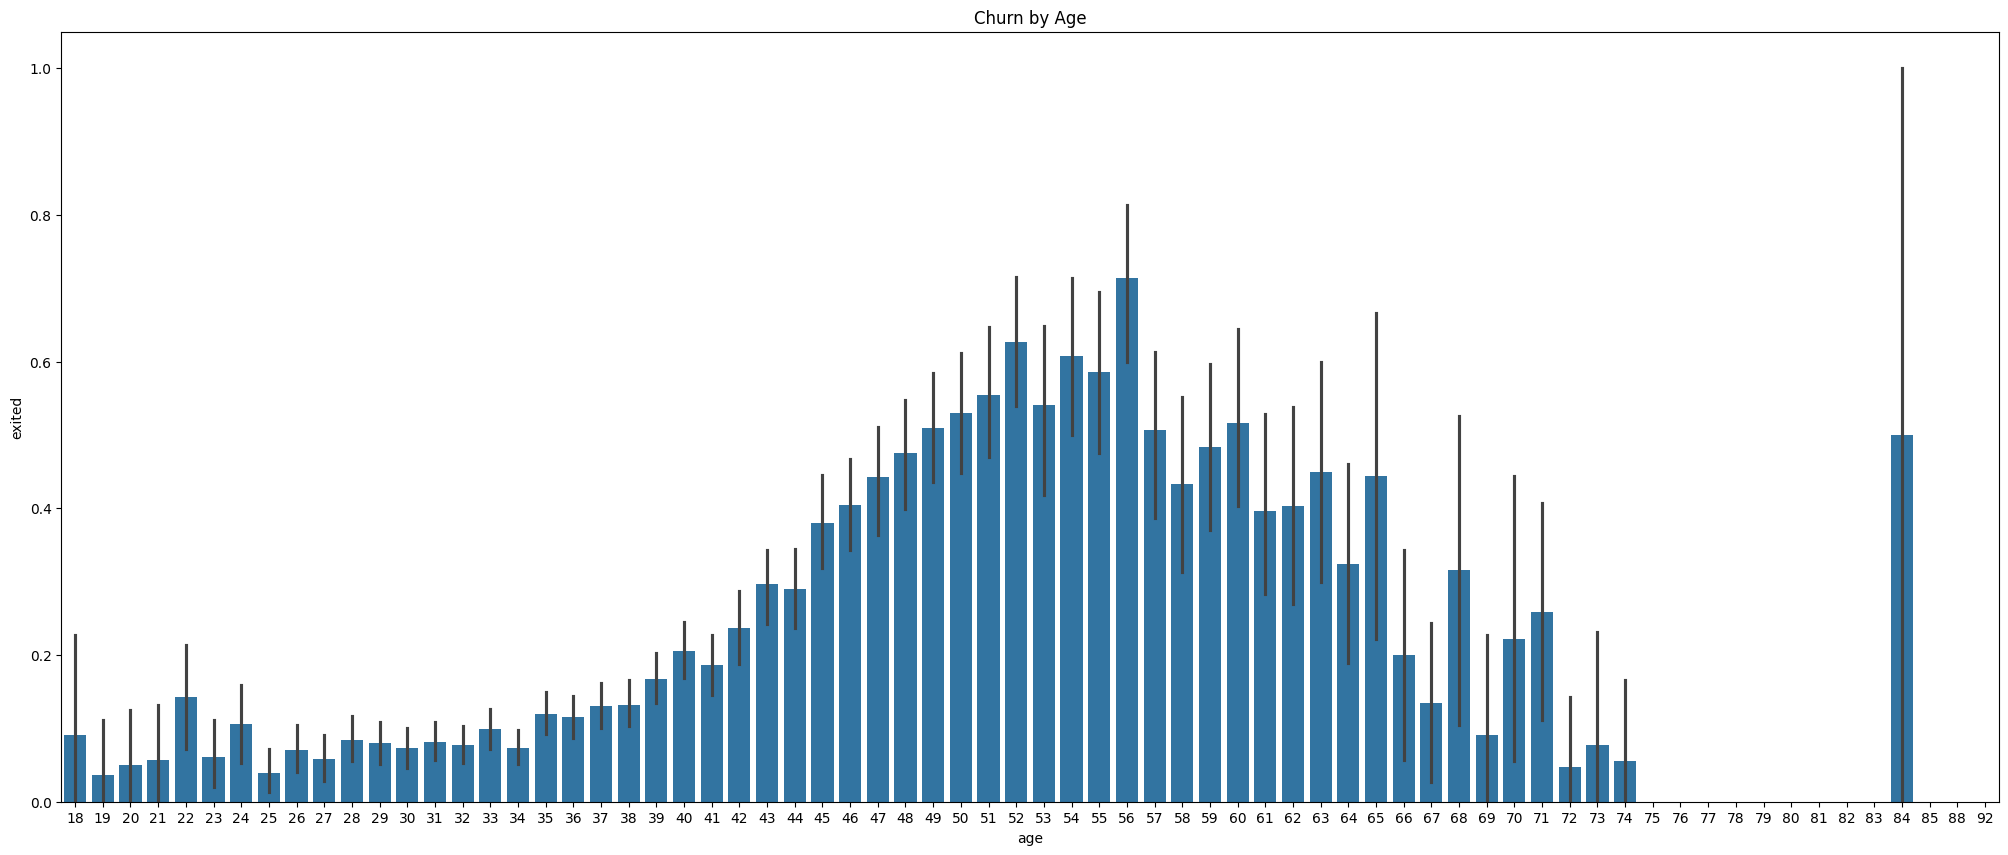

<Figure size 640x480 with 0 Axes>

In [14]:
#churn by age
plt.figure(figsize = (25, 10))
sns.barplot(x = 'age', y='exited', data = df_org)
plt.title("Churn by Age")
plt.show()
plt.savefig("barplot_churn_age.png")

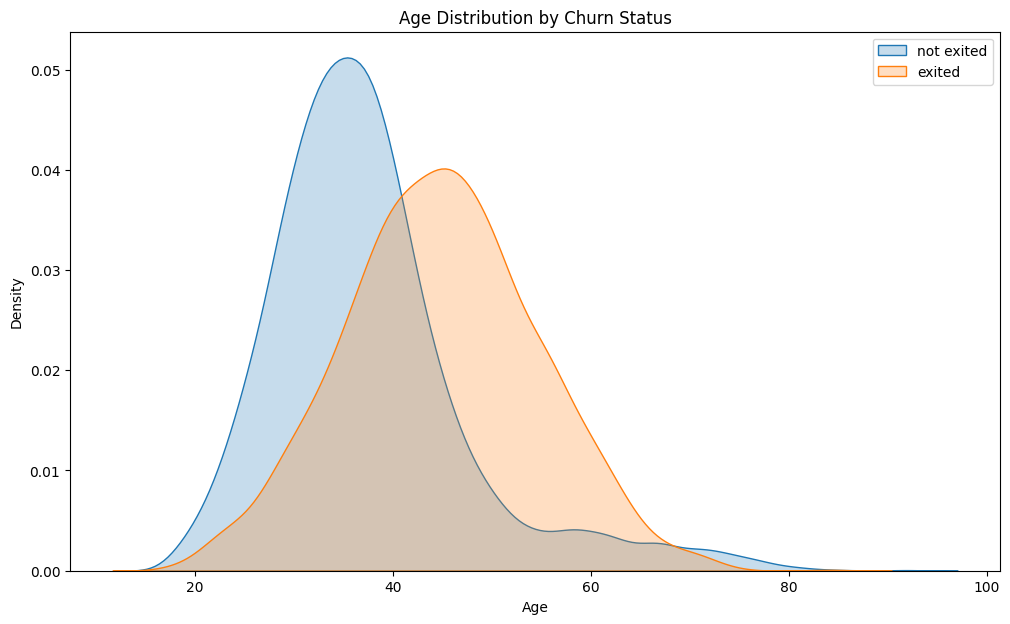

<Figure size 640x480 with 0 Axes>

In [28]:
#Age and Churn
plt.figure(figsize=(12, 7))
sns.kdeplot(df[df['exited'] == 0]['age'], label='not exited', fill=True)
sns.kdeplot(df[df['exited'] == 1]['age'], label='exited', fill=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
#plt.ylabel('Density')
plt.legend()
plt.show()
plt.savefig("churn_age.png")

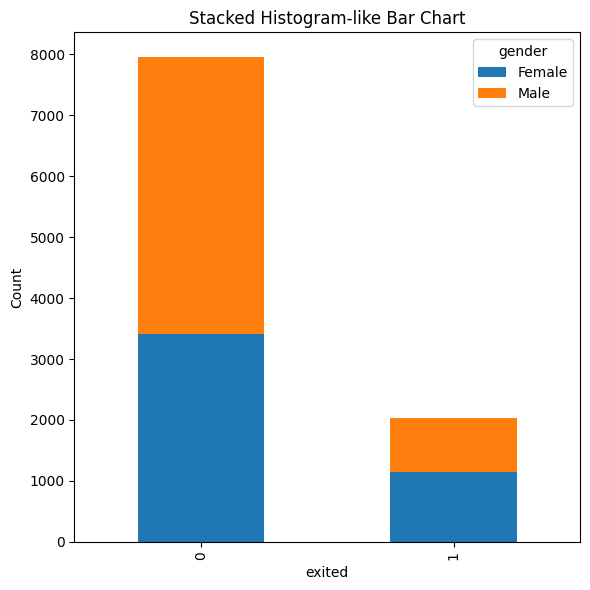

<Figure size 640x480 with 0 Axes>

In [16]:
#Gender and Churn
df_pivot = df.pivot_table(index='exited', columns='gender', aggfunc='size', fill_value=0)
df_pivot.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.title('Stacked Histogram-like Bar Chart')
plt.xlabel('exited')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig("churn_gender.png")

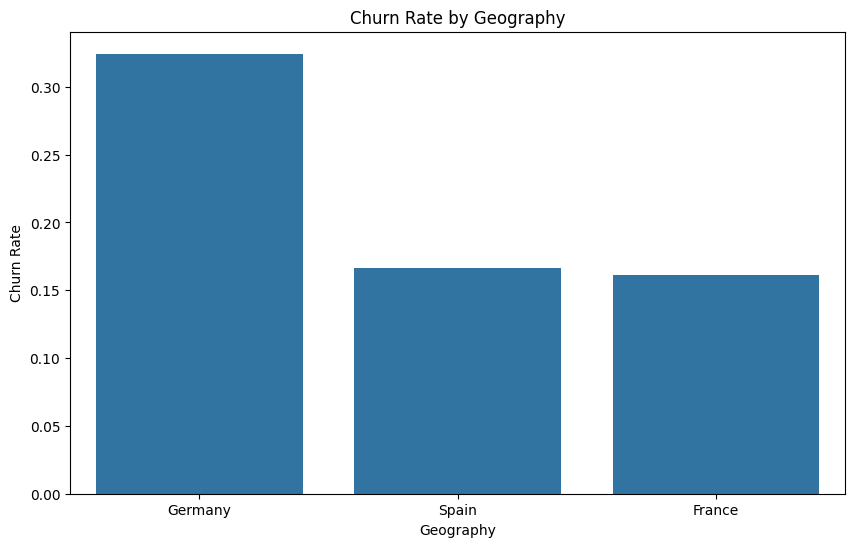

<Figure size 640x480 with 0 Axes>

In [18]:
#Churn by geography
churn_by_geography = df.groupby('geography')['exited'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_geography.index, y=churn_by_geography.values)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()
plt.savefig("churn_geo.png")

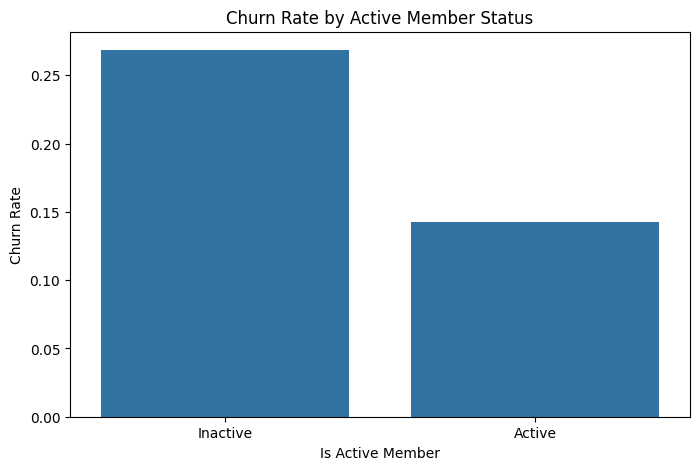

<Figure size 640x480 with 0 Axes>

In [19]:
#churn by Active status
churn_by_active_member = df.groupby('isactivemember')['exited'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_active_member.index, y=churn_by_active_member.values)
plt.title('Churn Rate by Active Member Status')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])
plt.xlabel('Is Active Member')
plt.ylabel('Churn Rate')
plt.show()
plt.savefig("churn_active.png")

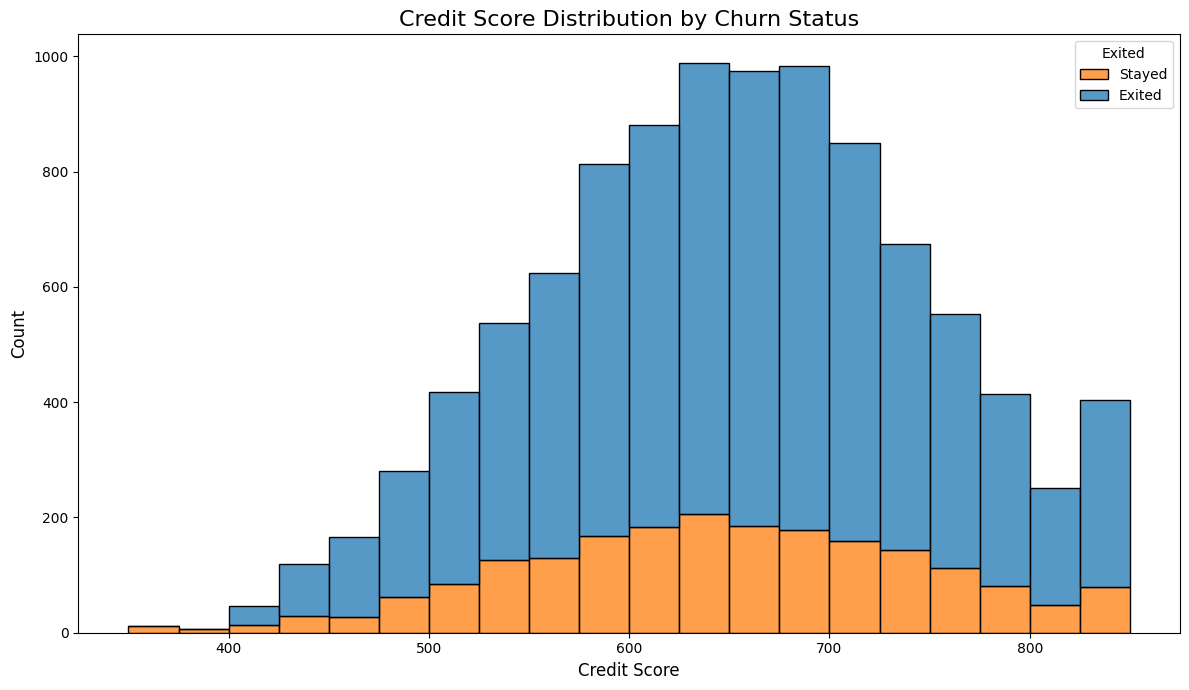

In [33]:
#reditScore and Churn
plt.figure(figsize=(12, 7))
sns.histplot(data=df_org, x='creditscore', hue='exited', multiple='stack', bins=20)
plt.title('Credit Score Distribution by Churn Status', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.tight_layout()
plt.show()

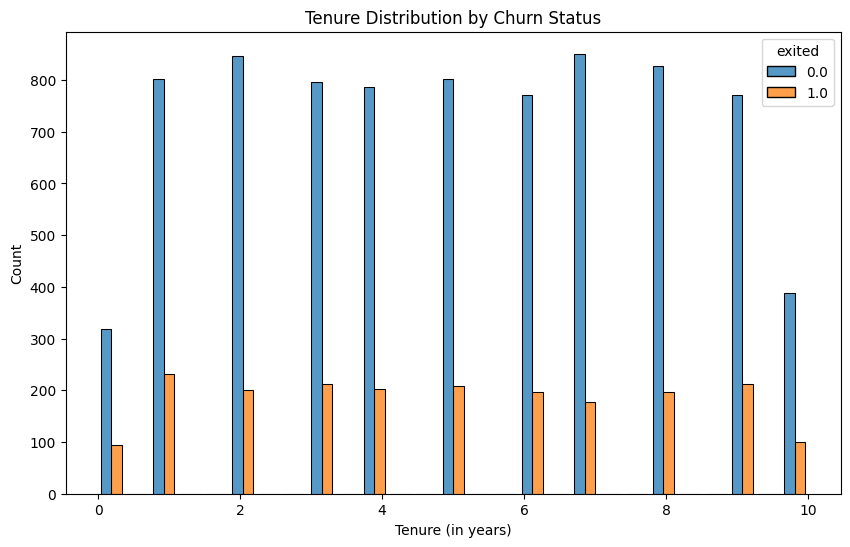

In [29]:
#Tenure and Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_org, x='tenure', hue='exited', multiple='dodge', shrink=0.8)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (in years)')
plt.ylabel('Count')
plt.show()

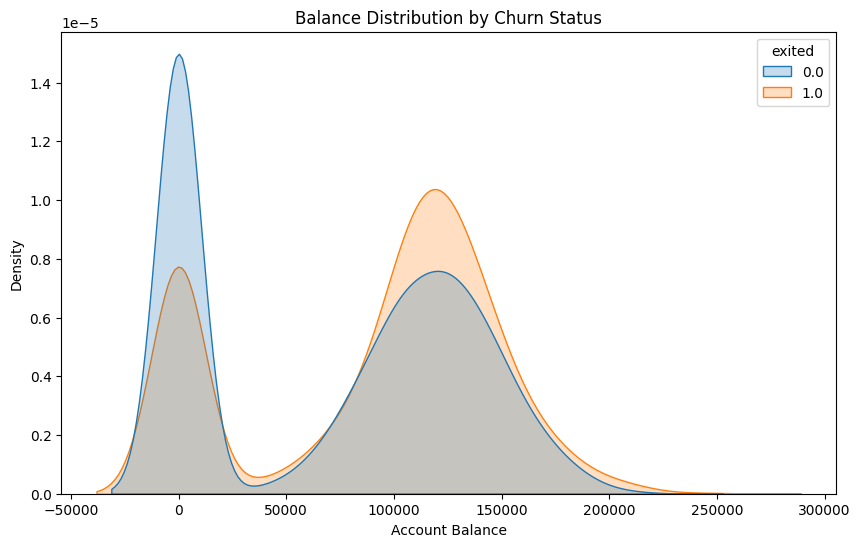

In [30]:
#Balance and Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_org, x='balance', hue='exited', fill=True, common_norm=False)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Account Balance')
plt.ylabel('Density')
plt.show()

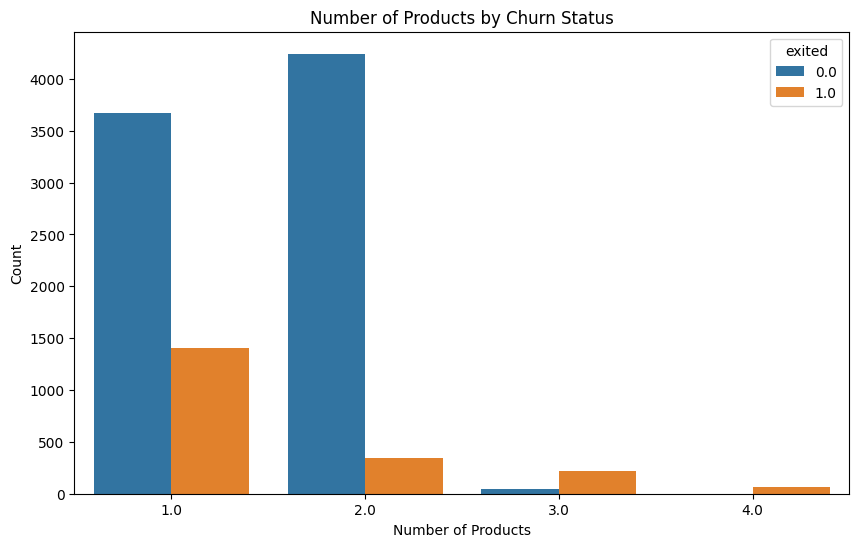

In [31]:
# Churn and NumOfProducts
plt.figure(figsize=(10, 6))
sns.countplot(x='numofproducts', hue='exited', data=df_org)
plt.title('Number of Products by Churn Status')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

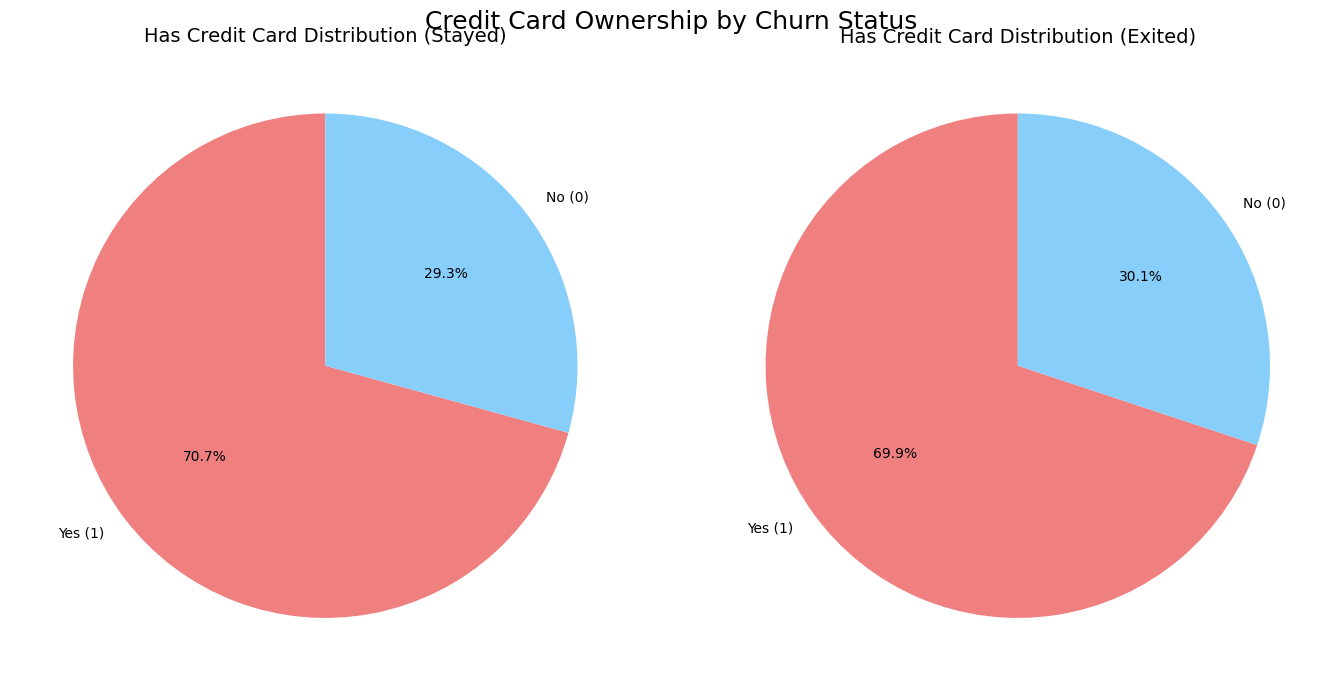

In [34]:
#HasCrCard and Churn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie Chart for non-churned customers
stayed_counts = df_org[df_org['exited'] == 0]['hascrcard'].value_counts()
ax1.pie(stayed_counts, labels=['Yes (1)', 'No (0)'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
ax1.set_title('Has Credit Card Distribution (Stayed)', fontsize=14)

# Pie Chart for churned customers
exited_counts = df_org[df_org['exited'] == 1]['hascrcard'].value_counts()
ax2.pie(exited_counts, labels=['Yes (1)', 'No (0)'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
ax2.set_title('Has Credit Card Distribution (Exited)', fontsize=14)

plt.suptitle('Credit Card Ownership by Churn Status', fontsize=18)
plt.tight_layout()
plt.show()

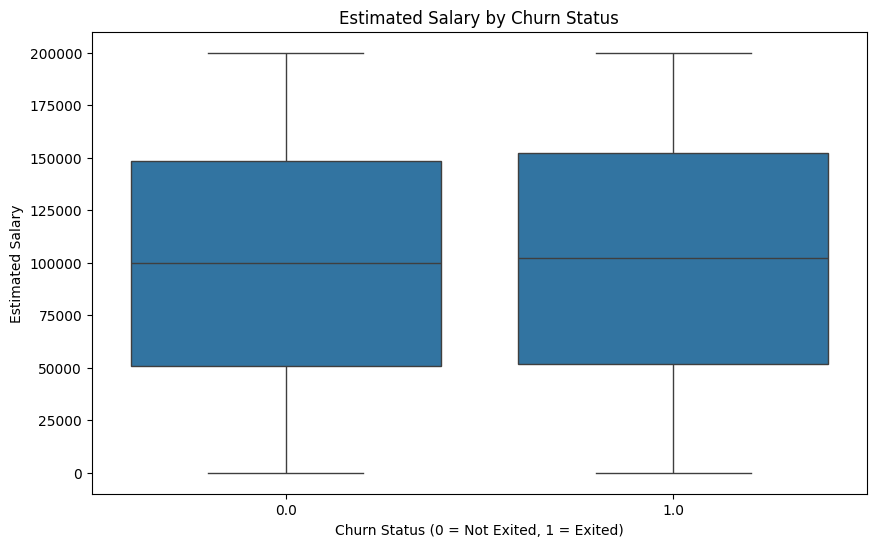

In [32]:
# Churn and EstimatedSalary
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='estimatedsalary', data=df_org)
plt.title('Estimated Salary by Churn Status')
plt.xlabel('Churn Status (0 = Not Exited, 1 = Exited)')
plt.ylabel('Estimated Salary')
plt.show()

In [20]:
#Light model (feature importance)
X = df_org.select_dtypes(include=['number'])
X = X.drop("exited", axis=1)
y = df_org["exited"]

model = LogisticRegression(max_iter=1000)
model.fit(X, y)
importance = pd.DataFrame({"feature": X.columns, "coef": model.coef_[0]})
importance = importance.sort_values(by="coef", key=abs, ascending=False)
print(importance.head(10))

           feature          coef
3              age  6.368846e-02
8   isactivemember -1.672098e-03
4           tenure -7.978997e-04
2      creditscore -7.754097e-04
6    numofproducts -1.561577e-04
7        hascrcard -5.512244e-05
0        rownumber -1.504172e-05
5          balance  5.017995e-06
9  estimatedsalary  6.285918e-07
1       customerid -2.456295e-07


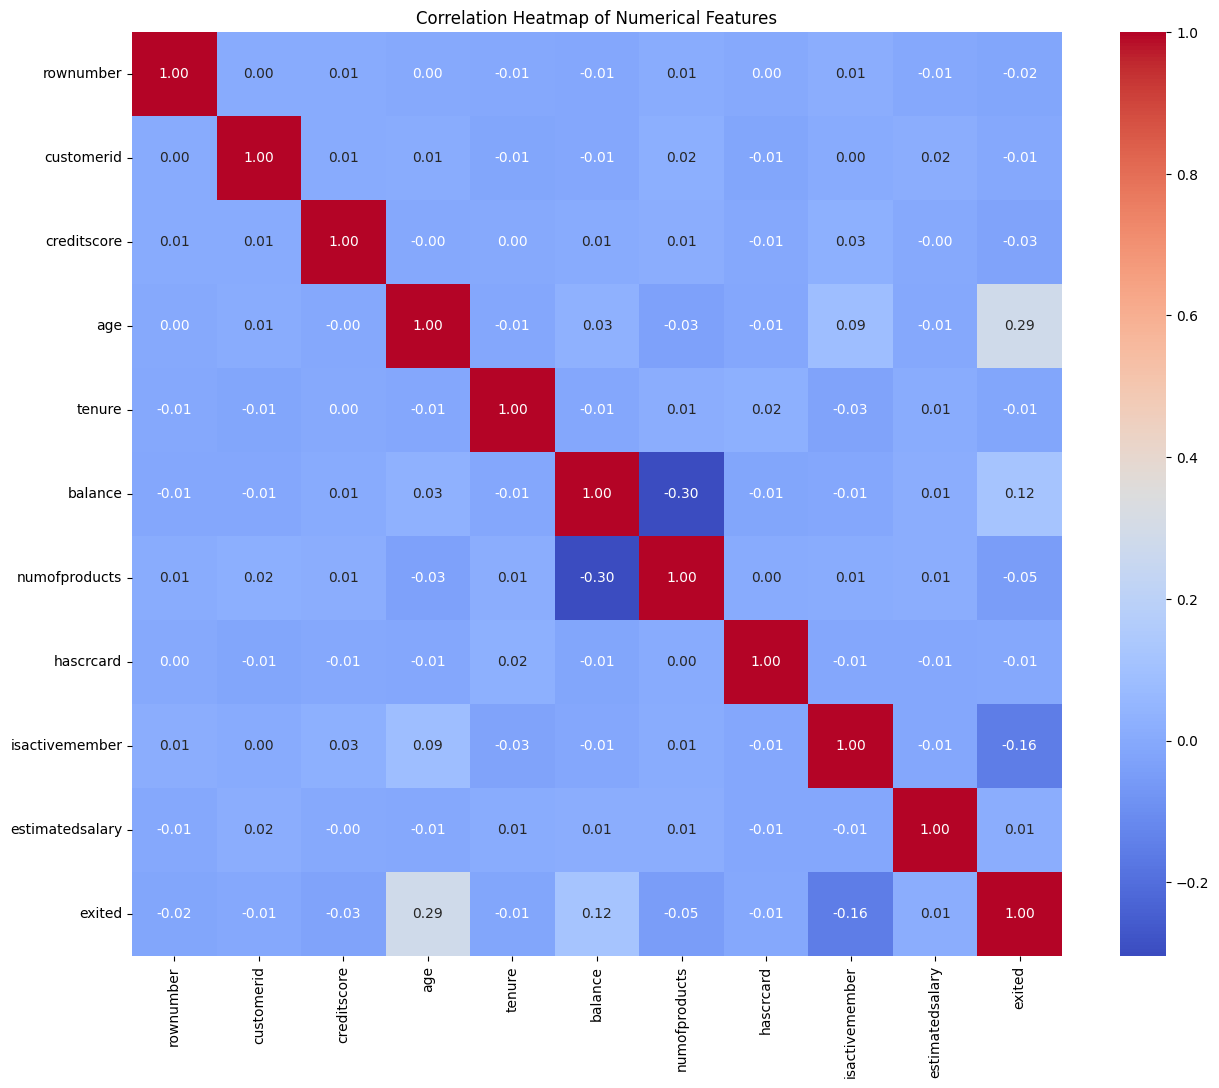

<Figure size 640x480 with 0 Axes>

In [13]:
#heatmap
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
plt.savefig("correlation_heatmap.png")